In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Carregando os dados a partir de um .csv (lembrar de importar o arquivo na aba à esquerda)

In [ ]:
dataset = pd.read_csv('InputPerfilNutricionalReduzidoContinuas.csv')
dataset_backup=dataset.copy()

In [ ]:
dataset.head()

,subject_id,max_alkaline,max_alt,max_ast,high_bilirubins_days,high_triglycerides_days
0,19128174,0,0,0,0,0
1,15133454,0,0,0,0,0
2,17910930,0,0,0,0,0
3,15918842,0,0,0,25,0
4,13347746,0,1,2,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   subject_id            7493 non-null   int64
 1   hypo_albumin_days     7493 non-null   int64
 2   low_totallynpho_days  7493 non-null   int64
 3   low_hemoglobine_days  7493 non-null   int64
dtypes: int64(4)
memory usage: 234.3 KB


In [ ]:
#dataset = dataset.iloc[0:, 1:11]     #CondicaoClinicaRevisada
dataset = dataset.iloc[0:, 1:4]     #GravidadeRevisada
dataset.head()

,hypo_albumin_days,low_totallynpho_days,low_hemoglobine_days
0,0,0,0
1,0,0,0
2,0,0,60
3,0,0,22
4,0,0,25


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   hypo_albumin_days     7493 non-null   int64
 1   low_totallynpho_days  7493 non-null   int64
 2   low_hemoglobine_days  7493 non-null   int64
dtypes: int64(3)
memory usage: 175.7 KB


-----------------------------
Utilizando MeanShift
-----------------------------

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import random

In [ ]:
# Defina a semente aleatória (reproduzível)
random.seed(123)
bandwidth = estimate_bandwidth(dataset_atrib, quantile=0.3, n_samples=None, random_state=42)
bandwidth

14.872307586496719

In [ ]:
from time import time

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=False)

t0 = time()

ms.fit(dataset_atrib)

fit_time = time() - t0

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


print(82 * "_")
print("init\t\ttime\tsilhouette\tvariancia\tsimilaridade")

################ métricas ################

name="MeanShift"
results = [name, fit_time, metrics.silhouette_score(dataset_atrib, labels, metric='euclidean'), metrics.calinski_harabasz_score(dataset_atrib, labels), davies_bouldin_score(dataset_atrib, labels)]

# Show the results
formatter_result = (
    "{:9s}\t{:.3f}s\t{:.3f}\t\t{:.3f}\t{:.3f}"
)
print(formatter_result.format(*results))


print("number of estimated clusters : %d" % n_clusters_)

__________________________________________________________________________________
init		time	silhouette	variancia	similaridade
MeanShift	16.643s	0.758		10673.058	0.537
number of estimated clusters : 14


Juntar a coluna cluster com as demais colunas:

In [ ]:
#colunas = ['FB72H','FB72htrend','FB72hvariation','FBtrend','diarrhea','constipation','HGThyper_days','HGThypo_days','temperature_proportion']
#colunas = ['noraTo025days','nora025to050days','noraupto050days','norafreedays','vaso_days','hemodialysis','MV_return','MV_start','MV_stay','MV_weaning']
#colunas = ['high_urea_days','high_creatinine_days']
#colunas = ['hyper_sodium_days','hypo_sodium_days','hyper_potassium_days','hypo_potassium_days','hyper_magnesium_days','hypo_magnesium_days','hypo_phosphor']
#colunas = ['hypo_albumin_days','low_totallynpho_days','low_hemoglobine_days']
colunas = ['max_alkaline','max_alt','max_ast','high_bilirubins_days','high_triglycerides_days']
cluster_map = pd.DataFrame(dataset, columns = colunas)
cluster_map['cluster'] = ms.labels_
cluster_map

,max_alkaline,max_alt,max_ast,high_bilirubins_days,high_triglycerides_days,cluster
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,25,0,1
4,0,1,2,0,0,0
...,...,...,...,...,...,...
7488,0,2,2,0,0,0
7489,0,0,0,0,0,0
7490,0,0,1,0,0,0
7491,2,1,1,0,0,0


Analisar relações entre pares de variáveis para entender a formação dos clusters:

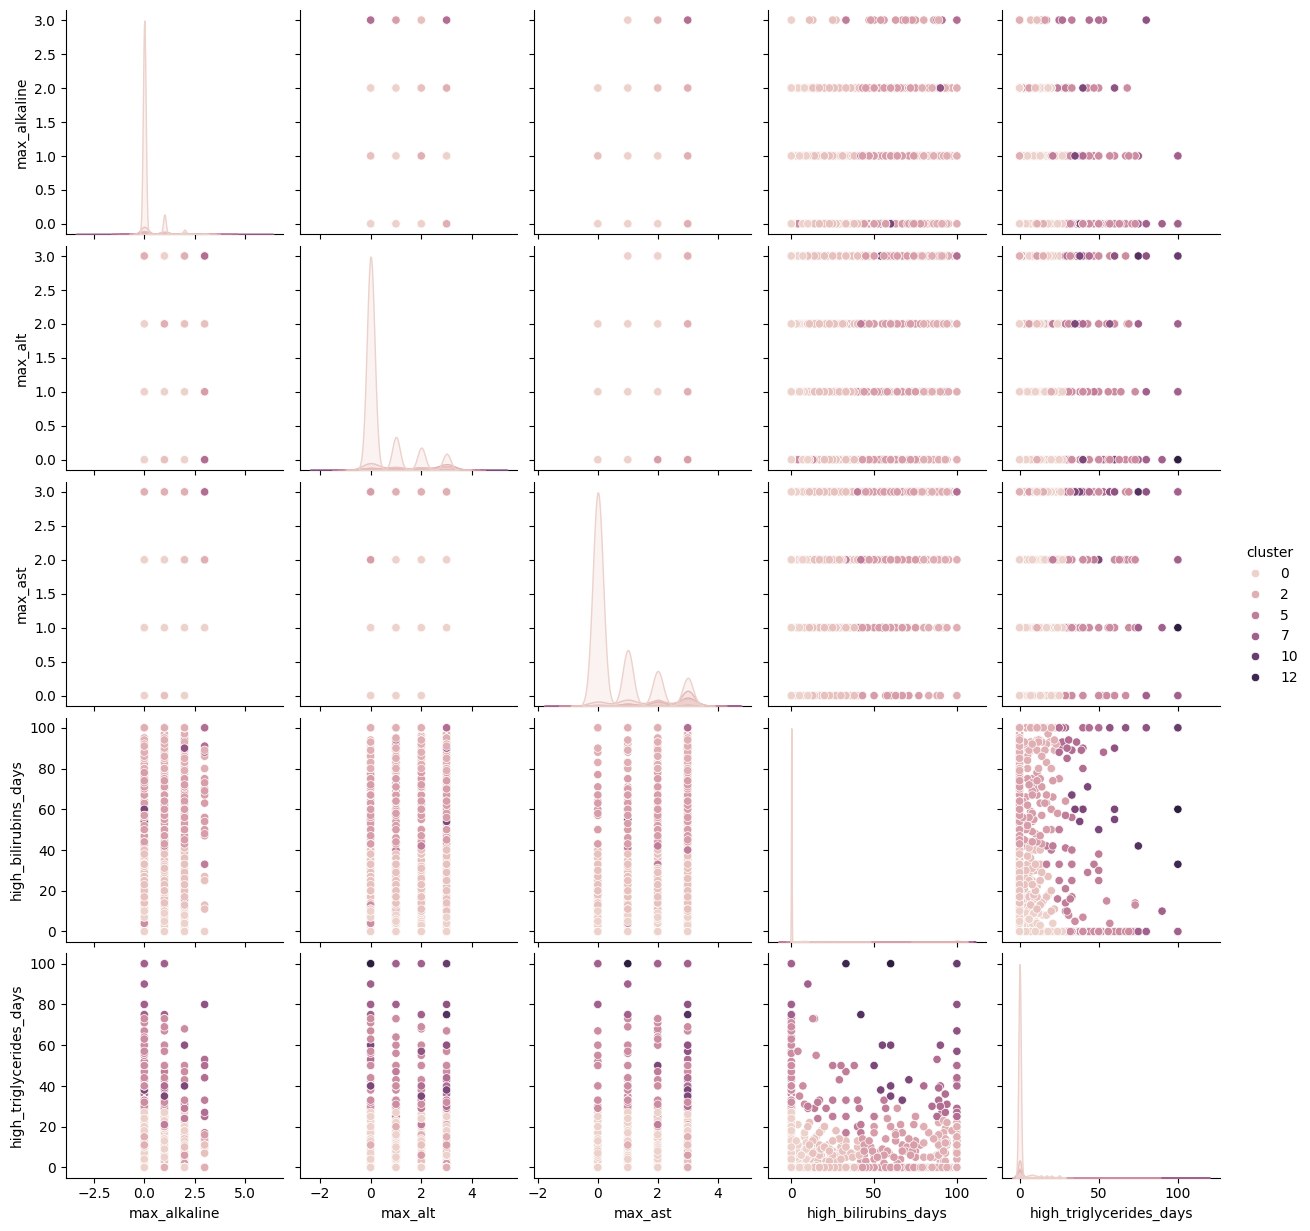

In [ ]:
sns.pairplot(cluster_map, hue='cluster')

Verificar a distribuição dos clusters:

In [ ]:
print('MeanShift - Balanceamento dos clusters')
y = cluster_map['cluster']
y.value_counts(normalize=False)

MeanShift - Balanceamento dos clusters


cluster
0     5709
1      673
2      507
3      410
4      100
5       37
6       25
7       12
9       11
8        4
10       2
12       1
11       1
13       1
Name: count, dtype: int64

Gerando arquivo de saída.

In [ ]:
dataset_saida = dataset_backup.copy()
dataset_saida['cluster']=cluster_map['cluster']
dataset_saida

,subject_id,max_alkaline,max_alt,max_ast,high_bilirubins_days,high_triglycerides_days,cluster
0,19128174,0,0,0,0,0,0
1,15133454,0,0,0,0,0,0
2,17910930,0,0,0,0,0,0
3,15918842,0,0,0,25,0,1
4,13347746,0,1,2,0,0,0
...,...,...,...,...,...,...,...
7488,17170682,0,2,2,0,0,0
7489,12727163,0,0,0,0,0,0
7490,18757959,0,0,1,0,0,0
7491,19195286,2,1,1,0,0,0


In [ ]:
dataset_saida.to_csv('ICUOutputGravidadeMeanShift.csv', index=False)

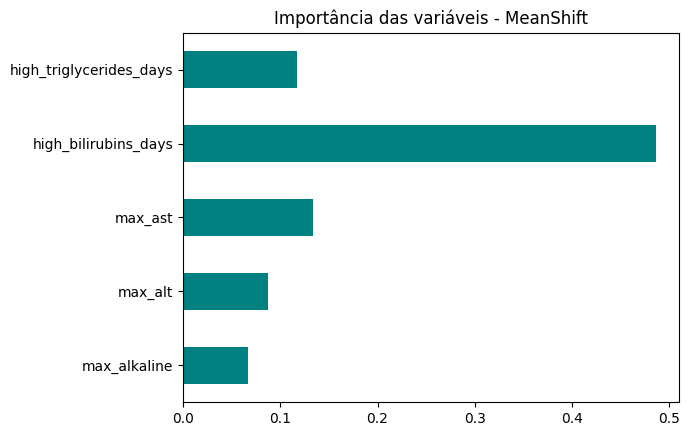

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(dataset_atrib, y)
feat_imprtances = pd.Series(importances, cluster_map.columns[0:len(cluster_map.columns)-1])
feat_imprtances.plot(kind='barh', color='teal')
plt.title('Importância das variáveis - MeanShift')
plt.show()

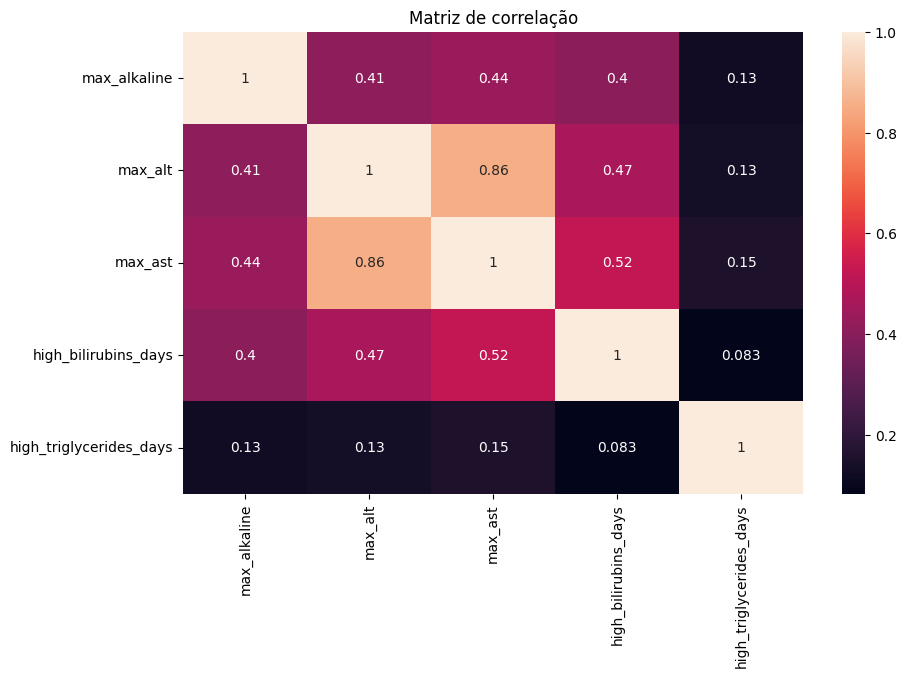

In [ ]:
import seaborn as sns

#matriz de correlação
cor = dataset.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)
plt.title('Matriz de correlação')
plt.show()

# **Utilizando K-means**

# Curva de Elbow

In [ ]:
maxvalue = 12

In [ ]:
dataset_atrib

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0, 60],
       ...,
       [ 0,  0, 50],
       [14,  0, 93],
       [ 0,  0, 75]])

Avaliando a silhueta e estimando o número de clusters ideal.
Fontes:
Usando inertia do kmeans Fonte do código: https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9
Ver tb: https://www.kaggle.com/code/eriveltonguedes/7-clusteriza-o-k-means-erivelton

In [ ]:
def calculate_wcss(data):
    wcsskplus = []
    wcsskrandom = []
    for n in range(1, maxvalue):

        kmeans_plus = KMeans(n_clusters=n, init='k-means++', n_init='auto', random_state = 42)
        kmeans_random = KMeans(init="random", n_clusters=n, n_init='auto', random_state=42)

        kmeans_plus.fit(X=data)
        wcsskplus.append(kmeans_plus.inertia_)

        kmeans_random.fit(X=data)
        wcsskrandom.append(kmeans_random.inertia_)

        if n > 1:
          score1 = silhouette_score(data, kmeans_plus.labels_, metric = 'euclidean')
          score2 = silhouette_score(data, kmeans_random.labels_, metric = 'euclidean')
          print('Silhueta para ' + str(n) + ' clusters - KMeans++: ' + str(score1) + '/ KMeansRandom: ' + str(score2))

    return wcsskplus, wcsskrandom

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = maxvalue+1, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

In [ ]:
import math

# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares_kPlus, sum_of_squares_kRandom = calculate_wcss(dataset_atrib)

# calculando a quantidade ótima de clusters
nplus = optimal_number_of_clusters(sum_of_squares_kPlus)
nrandom = optimal_number_of_clusters(sum_of_squares_kRandom)

Silhueta para 2 clusters - KMeans++: 0.421970423078943/ KMeansRandom: 0.5872267906903219
Silhueta para 3 clusters - KMeans++: 0.5054825335245384/ KMeansRandom: 0.5328749750952101
Silhueta para 4 clusters - KMeans++: 0.455028376627128/ KMeansRandom: 0.45323235072816204
Silhueta para 5 clusters - KMeans++: 0.4682346525685892/ KMeansRandom: 0.4741193584824266
Silhueta para 6 clusters - KMeans++: 0.4920894571661702/ KMeansRandom: 0.4941204659340585
Silhueta para 7 clusters - KMeans++: 0.44296523470356136/ KMeansRandom: 0.4767991549736708
Silhueta para 8 clusters - KMeans++: 0.5060269583411511/ KMeansRandom: 0.4923779647301558
Silhueta para 9 clusters - KMeans++: 0.522245624424829/ KMeansRandom: 0.51764570863269
Silhueta para 10 clusters - KMeans++: 0.5188870002247121/ KMeansRandom: 0.5295429167885598
Silhueta para 11 clusters - KMeans++: 0.5164248423085315/ KMeansRandom: 0.5329089533787279


In [ ]:
nplus

5

In [ ]:
nrandom

5

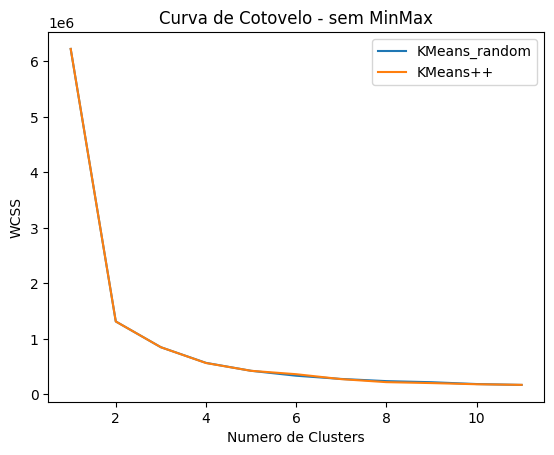

In [ ]:
# Mostra o Gráfico
plt.plot(range(1, maxvalue), sum_of_squares_kRandom, label='KMeans_random')
plt.plot(range(1, maxvalue), sum_of_squares_kPlus, label='KMeans++')
plt.title('Curva de Cotovelo - sem MinMax')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.legend()
plt.show()

# Benckmark das três técnicas disponibilizadas pelo Sklearn

- Inertia: usada para avaliar a coesão interna dos clusters. Ela representa a soma quadrada das distâncias entre cada ponto de dados e o seu centroide (centro) do cluster associado.
  - Inércia baixa: Indica que, em média, os pontos de dados estão próximos dos seus respectivos centroides. Isso sugere clusters bem definidos e coesos.
  - Inércia alta: Indica que, em média, os pontos de dados estão distantes dos seus centroides. Isso sugere clusters potencialmente mal formados ou com dispersão interna alta.

- Silhouette_score: considera tanto a coesão interna dos clusters (similaridade entre pontos dentro do mesmo cluster) quanto a separação entre clusters diferentes.
  - Valores próximos a 1 indicam clusters bem definidos, com alta coesão interna e boa separação entre clusters.
  - Valores próximos a 0 indicam clusters com separação moderada.
  - Valores negativos indicam agrupamentos ruins, com baixa coesão interna ou separação insuficiente entre clusters.

- Variância Critério de Razão: quanto maior mais os agrupamentos são densos e bem separados.

- Similaridade média entre os clusters (índice de Davies-Bouldin): compara as distâncias entre os agrupamentos com o temanho dos próprios aglomerados. 0 é o menor possível, melhor quando perto de 0.

Rodando os modelos com o número de clusters selecionado.

‘k-means++’: seleciona centróides iniciais do cluster usando amostragem baseada em uma distribuição de probabilidade empírica da contribuição dos pontos para a inércia geral. Ele difere do vanilla k-means++ por fazer vários testes em cada etapa de amostragem e escolher o melhor centróide entre eles.

'aleatório': escolha observações de n_clusters (linhas) aleatoriamente a partir dos dados dos centróides iniciais.

n_init: Número de vezes que o algoritmo k-means é executado com sementes centróides diferentes. O resultado final é o melhor resultado de n_init execuções consecutivas em termos de inércia.

**Selecionando o n. Decisão: Priorizar o menor valor de n desde que os clusters tenham uma distribuição similar.**

In [ ]:
#n=nrandom
#n=nplus
n=4
#ncompPCA=n
n

4

# Benchmark e seleção do estimador

In [ ]:
from time import time

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
print(82 * "_")
print("init\t\ttime\tinertia\tsilhouette\tvariancia\tsimilaridade")

################ K-Means++ ################

kmeans_plus = KMeans(n_clusters=n, init='k-means++', n_init='auto', random_state=42)

t0 = time()

kmeans_plus.fit(X=dataset_atrib)

fit_time = time() - t0
name="k-means++"
labels=kmeans_plus.labels_
results = [name, fit_time, kmeans_plus.inertia_, metrics.silhouette_score(dataset_atrib, labels, metric='euclidean'), metrics.calinski_harabasz_score(dataset_atrib, labels), davies_bouldin_score(dataset_atrib, labels)]

# Show the results
formatter_result = (
    "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t\t{:.3f}\t{:.3f}"
)
print(formatter_result.format(*results))

################ K-Means Random ################

kmeans_random = KMeans(init="random", n_clusters=n, n_init='auto', random_state=42)

t0 = time()

kmeans_random.fit(X=dataset_atrib)

fit_time = time() - t0
name="Random"
labels=kmeans_random.labels_
results = [name, fit_time, kmeans_random.inertia_, metrics.silhouette_score(dataset_atrib, labels, metric='euclidean'), metrics.calinski_harabasz_score(dataset_atrib, labels), davies_bouldin_score(dataset_atrib, labels)]

# Show the results
formatter_result = (
    "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t\t{:.3f}\t{:.3f}"
)
print(formatter_result.format(*results))

################ K-Means PCA-based ################

#pca = PCA(n_components=ncompPCA).fit(dataset_atrib)
#kmeansPCA = KMeans(init=pca.components_, n_clusters=n, n_init=1)

#t0 = time()

#kmeansPCA.fit(X=dataset_atrib)

#fit_time = time() - t0
#name="PCA_based"
#labels=kmeansPCA.labels_
#results = [name, fit_time, kmeansPCA.inertia_, metrics.silhouette_score(dataset_atrib, labels, metric='euclidean'), metrics.calinski_harabasz_score(dataset_atrib, labels), davies_bouldin_score(dataset_atrib, labels)]

# Show the results
#formatter_result = (
#    "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t\t{:.3f}\t{:.3f}"
#)
#print(formatter_result.format(*results))

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	silhouette	variancia	similaridade
k-means++	0.184s	1985597	0.455		6511.267	0.792
Random   	0.145s	1984648	0.453		6515.572	0.796
__________________________________________________________________________________


In [ ]:
print('K-Means++ - Balanceamento dos clusters')
pd.Series(kmeans_plus.labels_).value_counts().sort_index()

K-Means++ - Balanceamento dos clusters


0    3959
1    1304
2     449
3    1781
Name: count, dtype: int64

In [ ]:
print('K-MeansRandom - Balanceamento dos clusters')
pd.Series(kmeans_random.labels_).value_counts().sort_index()

K-MeansRandom - Balanceamento dos clusters


0    3900
1     449
2    1266
3    1878
Name: count, dtype: int64

In [ ]:
print('K-MeansPCA - Balanceamento dos clusters')
pd.Series(kmeansPCA.labels_).value_counts().sort_index()

K-MeansPCA - Balanceamento dos clusters


0     476
1    5309
2     332
3    1376
Name: count, dtype: int64

Preparando o dataset de saída.

In [ ]:
#colunas = ['FB72H','FB72htrend','FB72hvariation','FBtrend','diarrhea','constipation','HGThyper_days','HGThypo_days','temperature_proportion']
#colunas = ['noraTo025days','nora025to050days','noraupto050days','norafreedays','vaso_days','hemodialysis','MV_return','MV_start','MV_stay','MV_weaning']
#colunas = ['high_urea_days','high_creatinine_days']
#colunas = ['hyper_sodium_days','hypo_sodium_days','hyper_potassium_days','hypo_potassium_days','hyper_magnesium_days','hypo_magnesium_days','hypo_phosphor']
colunas = ['hypo_albumin_days','low_totallynpho_days','low_hemoglobine_days']
#colunas = ['max_alkaline','max_alt','max_ast','high_bilirubins_days','high_triglycerides_days']

cluster_map = pd.DataFrame(dataset, columns = colunas)
cluster_map['cluster'] = kmeans_plus.labels_
cluster_map

,hypo_albumin_days,low_totallynpho_days,low_hemoglobine_days,cluster
0,0,0,0,2
1,0,0,0,2
2,0,0,60,3
3,0,0,22,2
4,0,0,25,2
...,...,...,...,...
7488,13,0,63,3
7489,29,0,100,1
7490,0,0,50,3
7491,14,0,93,0


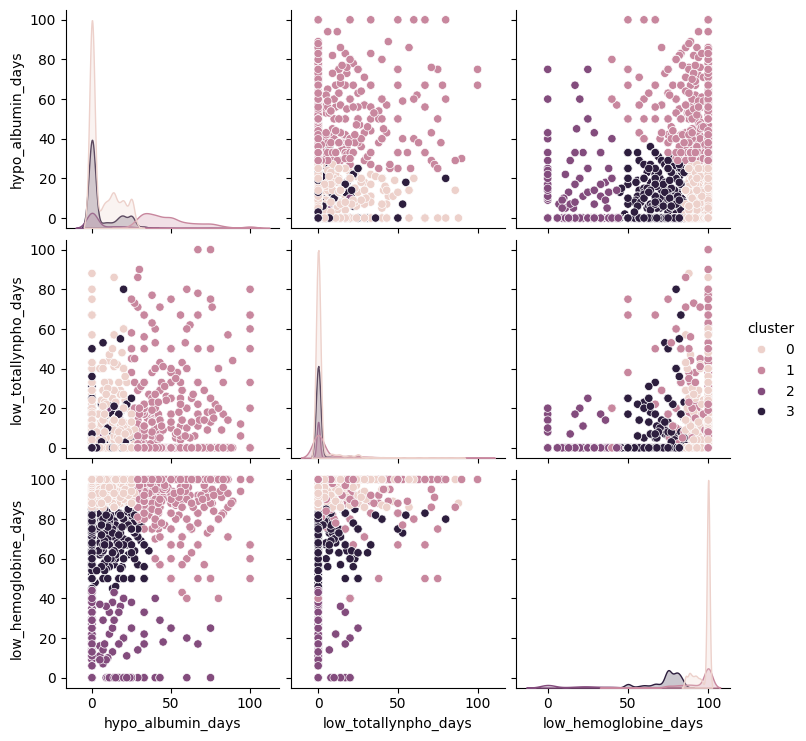

In [ ]:
sns.pairplot(cluster_map, hue='cluster')

In [ ]:
dsbkp1 = dataset_backup.copy()
dsbkp1['cluster']=cluster_map['cluster']
dsbkp1

,subject_id,hypo_albumin_days,low_totallynpho_days,low_hemoglobine_days,cluster
0,12670899,0,0,0,2
1,18803681,0,0,0,2
2,13589399,0,0,60,3
3,15440918,0,0,22,2
4,13436119,0,0,25,2
...,...,...,...,...,...
7488,19215239,13,0,63,3
7489,15953468,29,0,100,1
7490,18757959,0,0,50,3
7491,17903875,14,0,93,0


In [ ]:
y=cluster_map['cluster']
y.value_counts(normalize=False)

cluster
0    6032
1     736
2     725
Name: count, dtype: int64

In [ ]:
dsbkp1.to_csv('ICUOutputPerfilNutricionalRandomsemMM.csv', index=False)

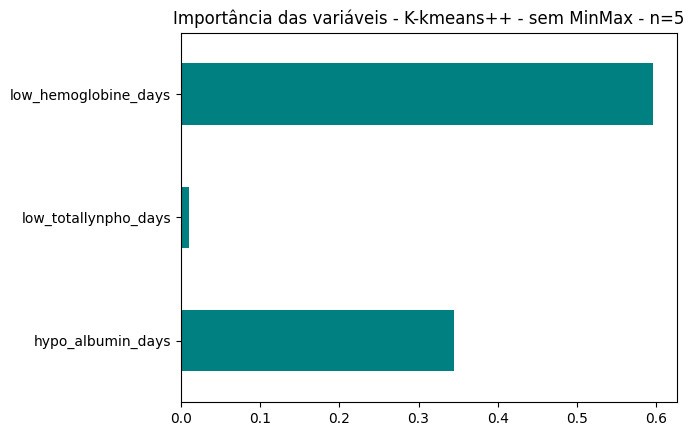

In [ ]:
from sklearn.feature_selection import mutual_info_classif

y = cluster_map['cluster']
importances = mutual_info_classif(dataset_atrib, y)
feat_imprtances = pd.Series(importances, cluster_map.columns[0:len(cluster_map.columns)-1])
feat_imprtances.plot(kind='barh', color='teal')
plt.title('Importância das variáveis - K-kmeans++ - sem MinMax - n=5')
plt.show()